In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

### Import Data

In [2]:
df = pd.read_csv('../data/data_combined.csv')

In [3]:
df.head()

,branch,date,product,turnover,year,month,week,day_of_month,day_of_week,school_holiday,...,snow_1h_min,snow_1h_max,snow_1h_std,snow_1h_06-10,snow_1h_11_15,snow_1h_16_20,condition_total,condition_6-10,condition_11-15,condition_16-20
0,Metro,2012-01-01,Mischbrote,134.735759,2012,1,52,1,6,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
1,Metro,2012-01-01,Weizenbrötchen,150.104897,2012,1,52,1,6,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
2,Metro,2012-01-01,klassischer Kuchen,322.635866,2012,1,52,1,6,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
3,Metro,2012-01-01,handliches Gebäck,1047.327119,2012,1,52,1,6,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy
4,Metro,2012-01-01,herzhafter Snack,816.663466,2012,1,52,1,6,False,...,0.0,0.0,0.0,0.0,0.0,0.0,rainy,rainy,rainy,rainy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52895 entries, 0 to 52894
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   branch            52895 non-null  object 
 1   date              52895 non-null  object 
 2   product           52895 non-null  object 
 3   turnover          52892 non-null  float64
 4   year              52895 non-null  int64  
 5   month             52895 non-null  int64  
 6   week              52895 non-null  int64  
 7   day_of_month      52895 non-null  int64  
 8   day_of_week       52895 non-null  int64  
 9   school_holiday    52895 non-null  bool   
 10  public_holiday    52895 non-null  bool   
 11  lock              52895 non-null  object 
 12  temp_mean         52895 non-null  float64
 13  temp_min          52895 non-null  float64
 14  temp_max          52895 non-null  float64
 15  temp_std          52895 non-null  float64
 16  temp_06-10        52895 non-null  float6

In [5]:
df.columns

Index(['branch', 'date', 'product', 'turnover', 'year', 'month', 'week',
       'day_of_month', 'day_of_week', 'school_holiday', 'public_holiday',
       'lock', 'temp_mean', 'temp_min', 'temp_max', 'temp_std', 'temp_06-10',
       'temp_11_15', 'temp_16_20', 'feels_like_mean', 'feels_like_min',
       'feels_like_max', 'feels_like_std', 'feels_like_06-10',
       'feels_like_11_15', 'feels_like_16_20', 'pressure_mean', 'pressure_min',
       'pressure_max', 'pressure_std', 'pressure_06-10', 'pressure_11_15',
       'pressure_16_20', 'humidity_mean', 'humidity_min', 'humidity_max',
       'humidity_std', 'humidity_06-10', 'humidity_11_15', 'humidity_16_20',
       'clouds_mean', 'clouds_min', 'clouds_max', 'clouds_std', 'clouds_06-10',
       'clouds_11_15', 'clouds_16_20', 'wind_speed_mean', 'wind_speed_min',
       'wind_speed_max', 'wind_speed_std', 'wind_speed_06-10',
       'wind_speed_11_15', 'wind_speed_16_20', 'wind_dir_x_mean',
       'wind_dir_x_min', 'wind_dir_x_max', 'wind_

In [6]:
df['weekend'] = (df.day_of_week>4)
df['holiday'] = np.logical_or(df.school_holiday, df.public_holiday)

['feels_like_06-10', 'feels_like_11_15', 'feels_like_16_20']


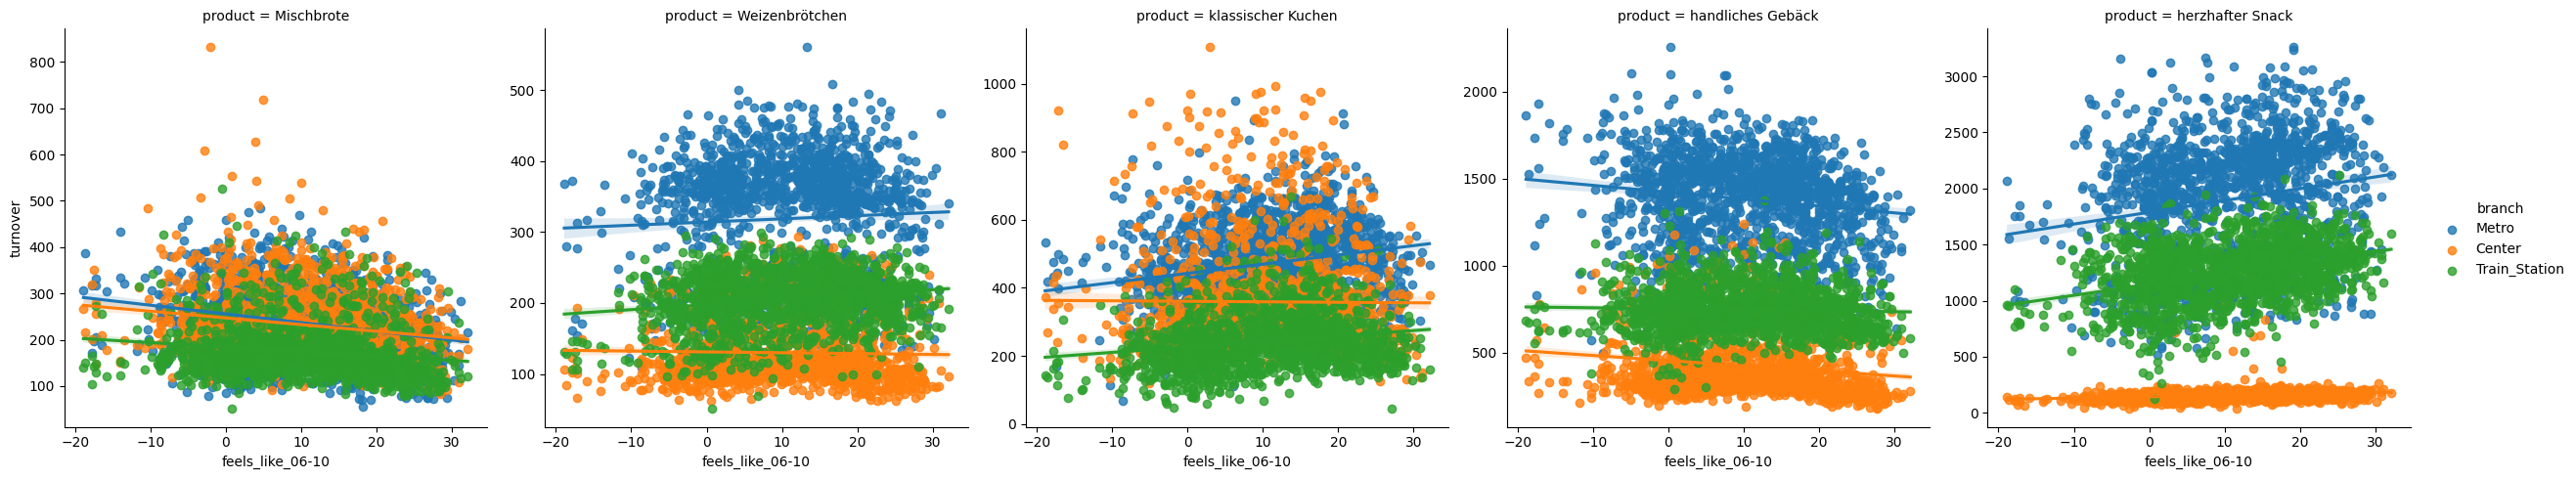

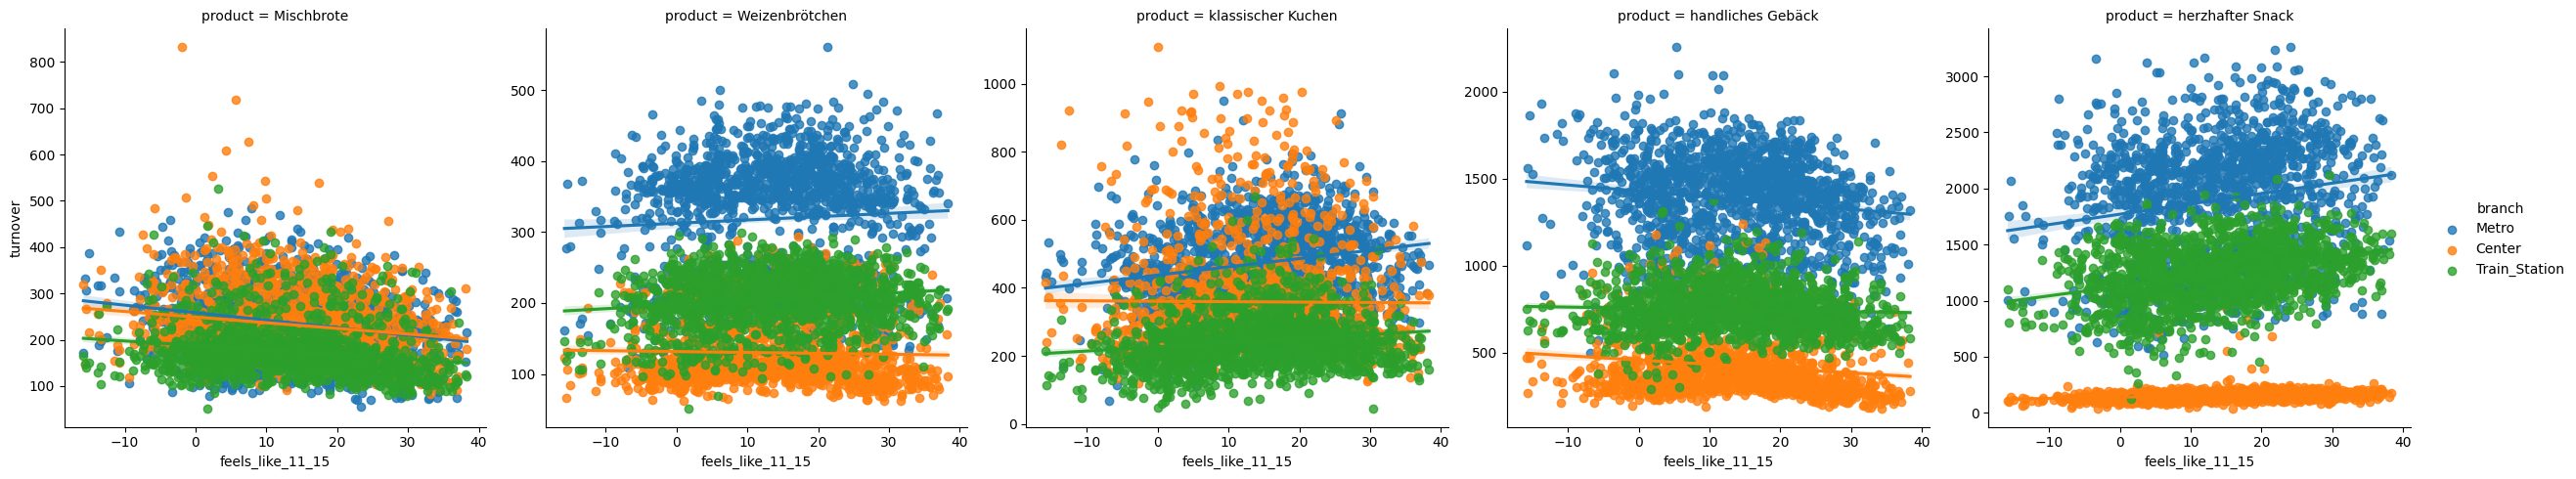

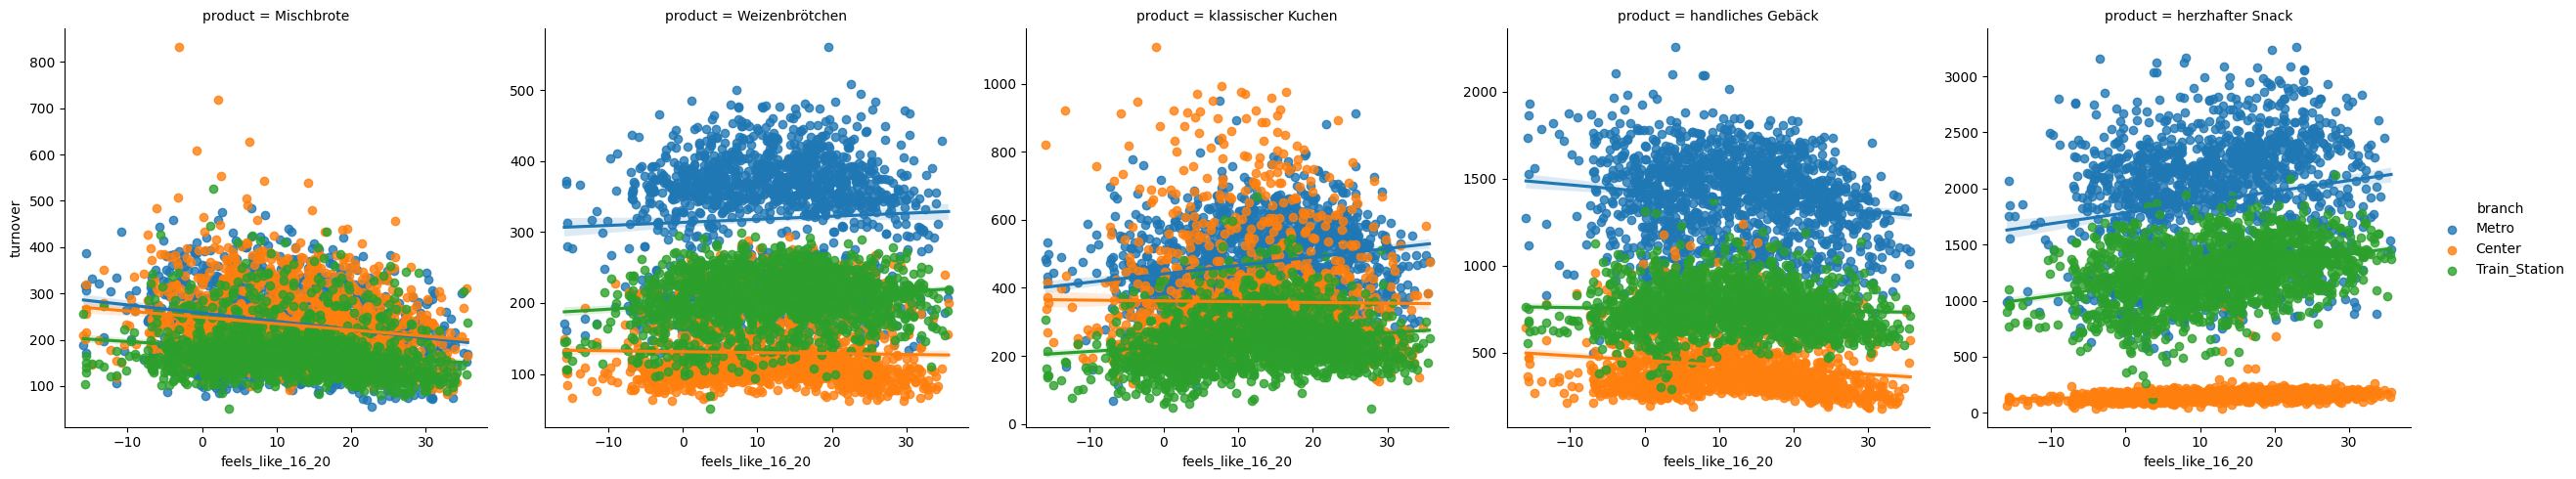

['rain_1h_06-10', 'rain_1h_11_15', 'rain_1h_16_20']


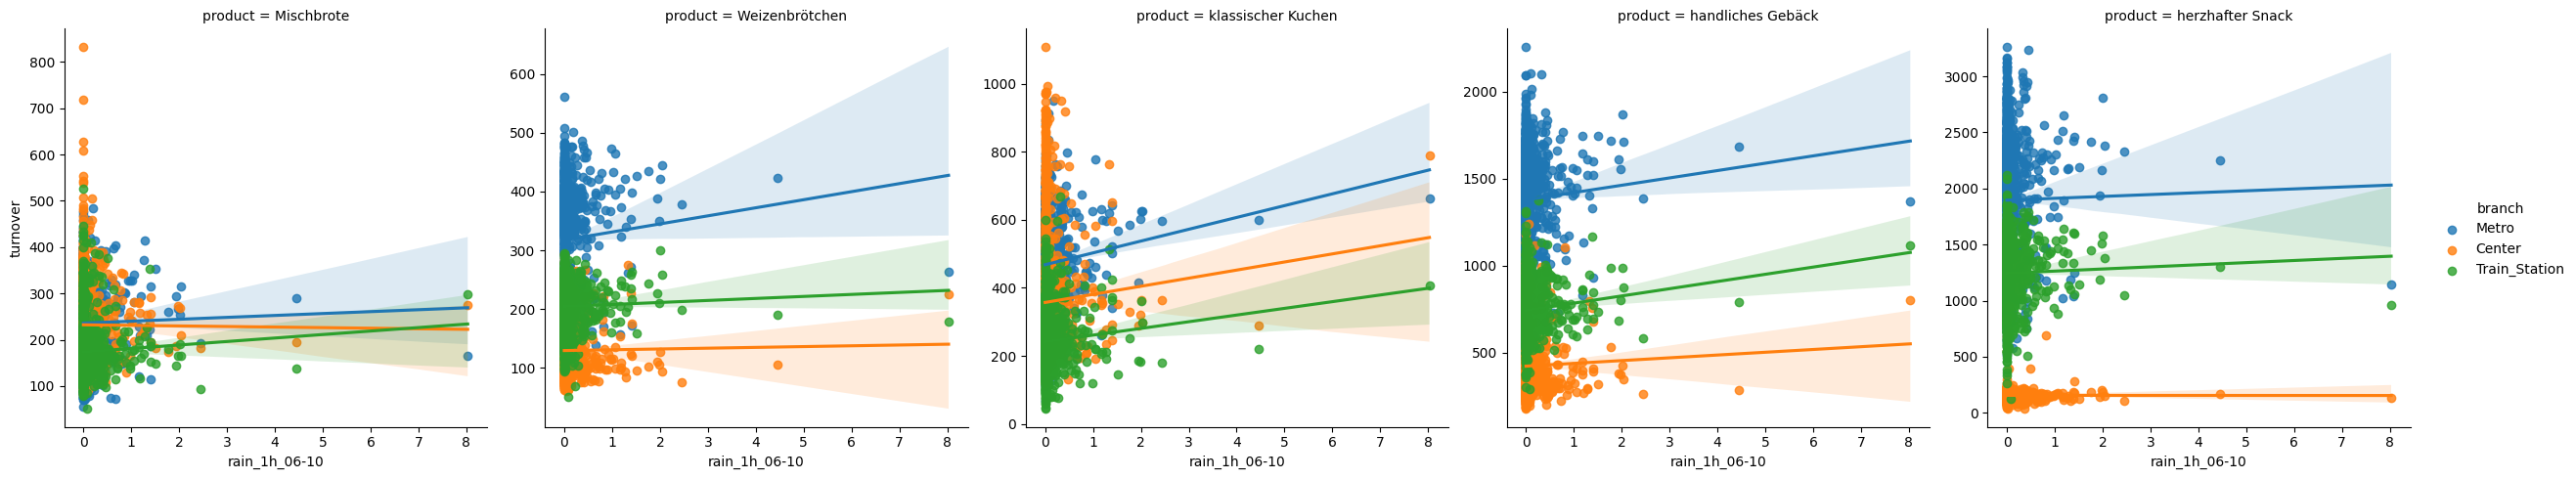

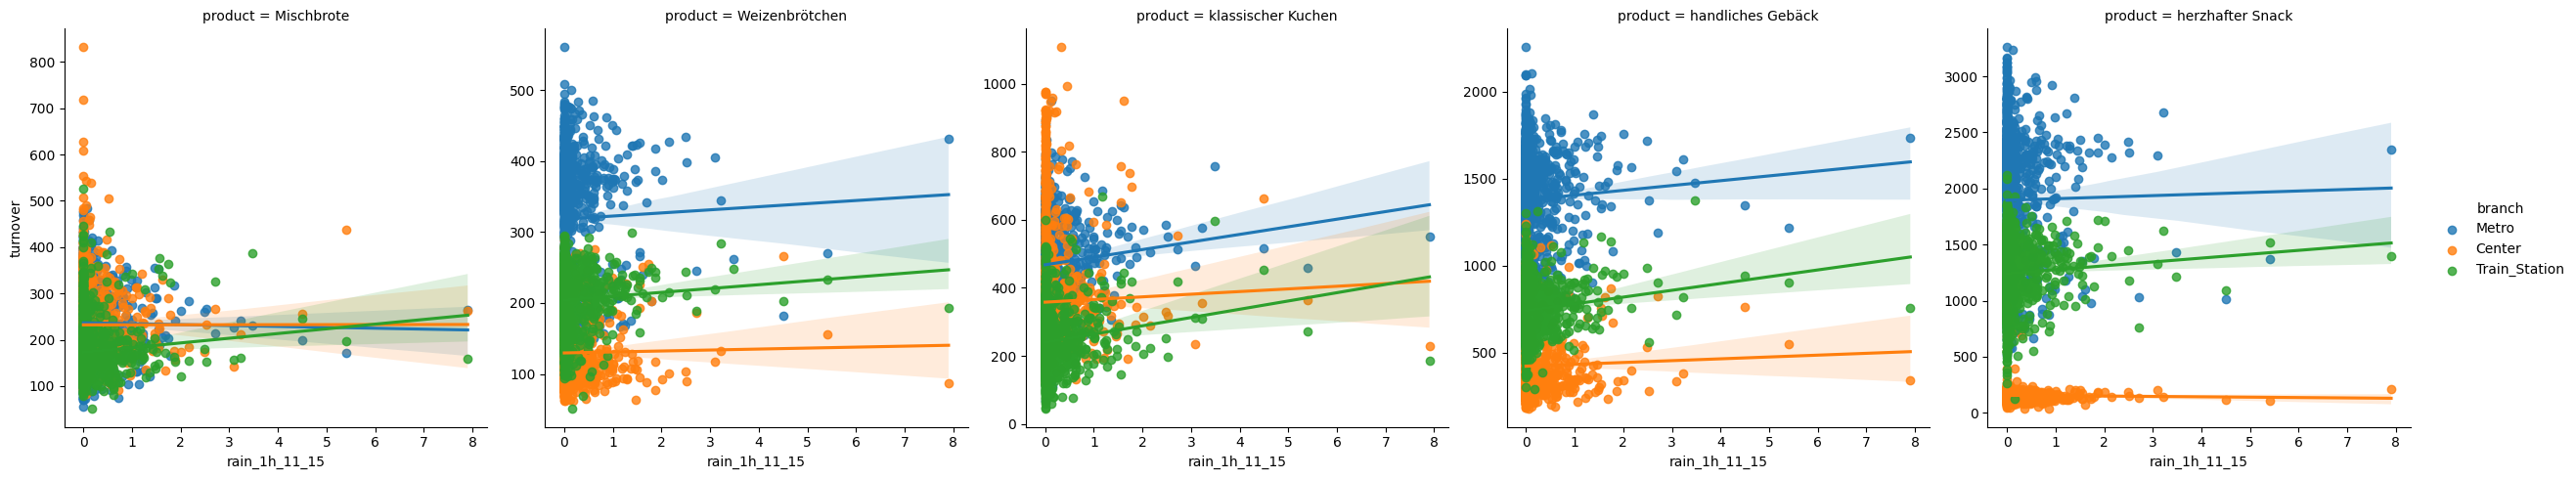

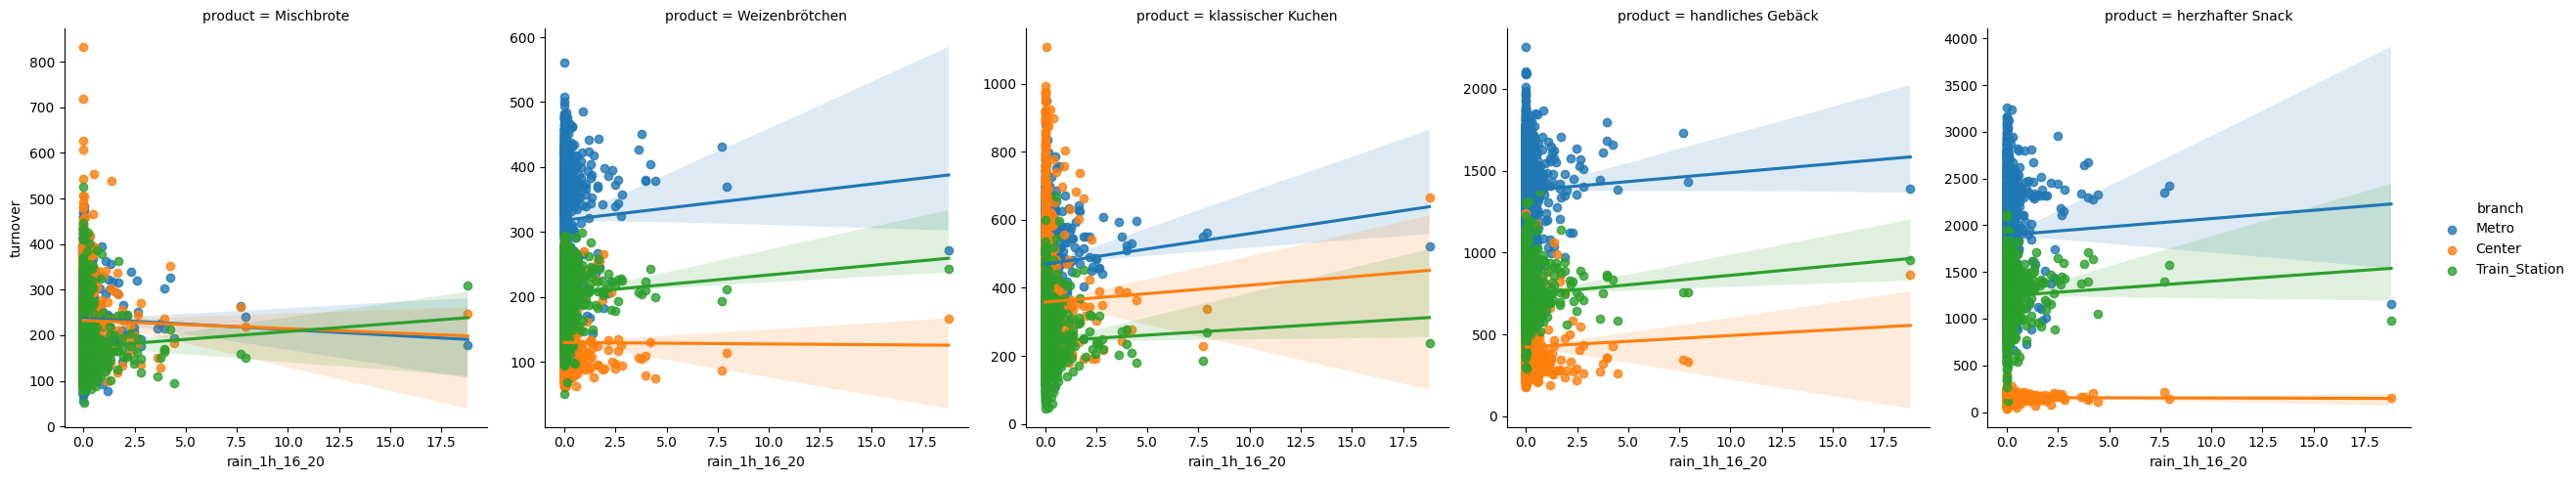

In [7]:
for cat in [['feels_like_06-10', 'feels_like_11_15', 'feels_like_16_20'], ['rain_1h_06-10', 'rain_1h_11_15', 'rain_1h_16_20']]:
    print(cat)
    for i in cat:
        sns.lmplot(data=df[df.year<2016], y='turnover', x=i, col='product', hue='branch', facet_kws=({'sharey':False}))
        plt.show()

In [8]:
df.condition_total.unique()

array(['rainy', 'cloudy', 'snowy', 'clear', "['rainy' 'snowy']",
       "['clear' 'cloudy' 'rainy']", "['clear' 'cloudy']",
       "['clear' 'stormy']", "['cloudy' 'rainy']", 'foggy',
       "['cloudy' 'snowy']", "['cloudy' 'rainy' 'snowy']",
       "['foggy' 'rainy']", "['cloudy' 'foggy']",
       "['clear' 'cloudy' 'snowy']", "['cloudy' 'rainy' 'stormy']",
       "['clear' 'foggy']", "['clear' 'cloudy' 'foggy']",
       "['clear' 'rainy']", "['cloudy' 'foggy' 'rainy']",
       "['foggy' 'snowy']"], dtype=object)

<AxesSubplot:xlabel='branch', ylabel='turnover'>

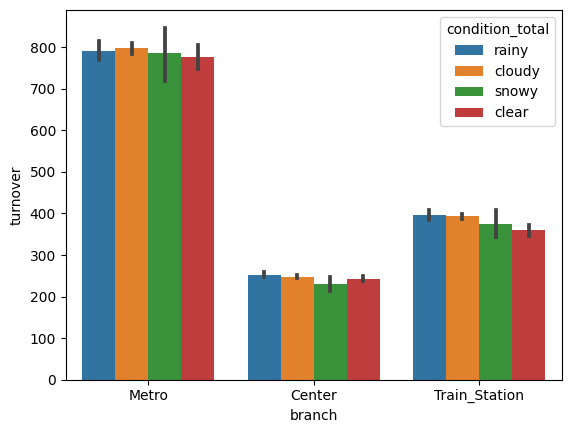

In [9]:
sns.barplot(data = df[df.condition_total.isin(df.condition_total.unique()[:4])], hue='condition_total', y='turnover', x='branch')

# New Prediction

In [15]:
df.sort_values(['date', 'branch', 'product'])['turnover_pred'] = df.sort_values(['date', 'branch', 'product']).turnover.shift(7*15)

In [16]:
df.columns

Index(['branch', 'date', 'product', 'turnover', 'year', 'month', 'week',
       'day_of_month', 'day_of_week', 'school_holiday', 'public_holiday',
       'lock', 'temp_mean', 'temp_min', 'temp_max', 'temp_std', 'temp_06-10',
       'temp_11_15', 'temp_16_20', 'feels_like_mean', 'feels_like_min',
       'feels_like_max', 'feels_like_std', 'feels_like_06-10',
       'feels_like_11_15', 'feels_like_16_20', 'pressure_mean', 'pressure_min',
       'pressure_max', 'pressure_std', 'pressure_06-10', 'pressure_11_15',
       'pressure_16_20', 'humidity_mean', 'humidity_min', 'humidity_max',
       'humidity_std', 'humidity_06-10', 'humidity_11_15', 'humidity_16_20',
       'clouds_mean', 'clouds_min', 'clouds_max', 'clouds_std', 'clouds_06-10',
       'clouds_11_15', 'clouds_16_20', 'wind_speed_mean', 'wind_speed_min',
       'wind_speed_max', 'wind_speed_std', 'wind_speed_06-10',
       'wind_speed_11_15', 'wind_speed_16_20', 'wind_dir_x_mean',
       'wind_dir_x_min', 'wind_dir_x_max', 'wind_

In [12]:
def calculate_eval_metrics(df_actual, df_residual):
    
    # iterate over all time series and calculate evaluation scores using list comprehension
    mean_actual = [np.mean(df_actual[col]).round(4) for col in df_residual.columns]
    std_actual = [np.std(df_actual[col]).round(4) for col in df_residual.columns]
    rmse_total = [np.sqrt(np.mean(np.square(df_residual[col]))).round(4) for col in df_residual.columns]
    mae_total = [np.mean(np.abs(df_residual[col])).round(4) for col in df_residual.columns]
    rmse_over = [np.sqrt(np.mean(np.square(df_residual[df_residual[col]>0][col]))).round(4) for col in df_residual.columns]
    rmse_under = [np.sqrt(np.mean(np.square(df_residual[df_residual[col]<=0][col]))).round(4) for col in df_residual.columns]
    mae_over = [np.mean(df_residual[df_residual[col]>0][col]).round(4) for col in df_residual.columns]
    mae_under = [np.mean(df_residual[df_residual[col]<=0][col]).round(4) for col in df_residual.columns]

    # combine to dataframe
    df_eval = pd.DataFrame({'groups': df_residual.columns, 
                            'mean_actual': mean_actual, 'std_actual': std_actual,
                            'rmse_total': rmse_total, 'mae_total': mae_total,
                            'rmse_over': rmse_over, 'rmse_under': rmse_under, 'mae_over': mae_over, 'mae_under': mae_under})
    df_eval.set_index('groups', inplace=True, drop=True)
    
    # return evaluation metrics
    return df_eval